In [1]:
from functools import partial

import matplotlib.pyplot as plt
from rlaopt.kernels import RBFLinOp, Matern12LinOp, Matern32LinOp, Matern52LinOp
import torch

from scalable_gp_inference.random_features import rbf_random_features, matern_random_features

In [2]:
torch.set_default_dtype(torch.float64)
torch.manual_seed(1)

In [3]:
device = torch.device("cuda:0")

n = 4
d = 10
lengthscale_scalar = 2.0
lengthscale_tensor = torch.tensor([3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0], device=device)
num_features_grid = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7, 10 ** 8]

X = torch.randn(n, d, device=device) / (d ** 0.5)

idx1 = 1
idx2 = 2

In [4]:
def test_rf_fn(kernel_linop_class, rf_fn, X, lengthscale, num_features):
    kernel_linop = kernel_linop_class(X, X, {"lengthscale": lengthscale})
    K_true = kernel_linop @ torch.eye(kernel_linop.shape[1], device=kernel_linop.device)
    K_rf = rf_fn(X, lengthscale, num_features)
    K_approx = K_rf @ K_rf.T
    return K_true - K_approx


def test_rf_fn_grid(kernel_linop_class, rf_fn, X, lengthscale, num_features_grid, n_trials=30, idx1=0, idx2=0):
    diffs_at_loc = {}
    for num_features in num_features_grid:
        diff = 0.0
        for _ in range(n_trials):
            K_diff = test_rf_fn(kernel_linop_class, rf_fn, X, lengthscale, num_features)
            diff += K_diff[idx1, idx2].item()
        diff /= n_trials
        diffs_at_loc[num_features] = abs(diff)
    return diffs_at_loc


def plot_diffs(diffs, title):
    plt.semilogy(list(diffs.keys()), list(diffs.values()))
    plt.xscale("log")
    plt.xlabel("Number of random features")
    plt.ylabel("Error")
    plt.title(title)
    plt.show()

RBF

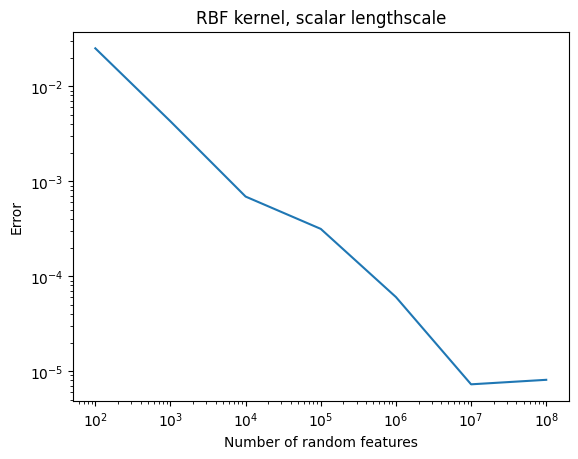

In [5]:
diffs_00 = test_rf_fn_grid(RBFLinOp, rbf_random_features, X, lengthscale_scalar, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "RBF kernel, scalar lengthscale")

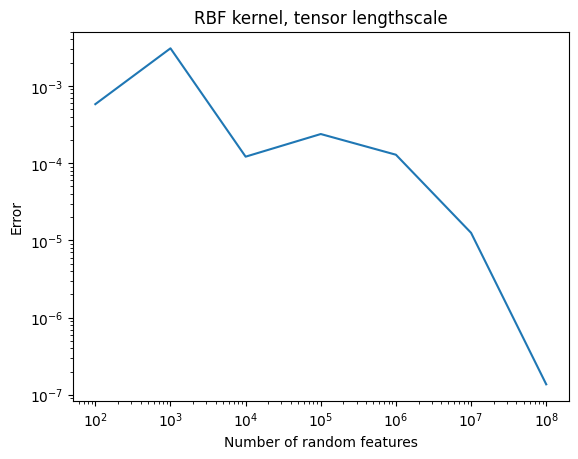

In [6]:
diffs_00 = test_rf_fn_grid(RBFLinOp, rbf_random_features, X, lengthscale_tensor, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "RBF kernel, tensor lengthscale")

Matern-1/2

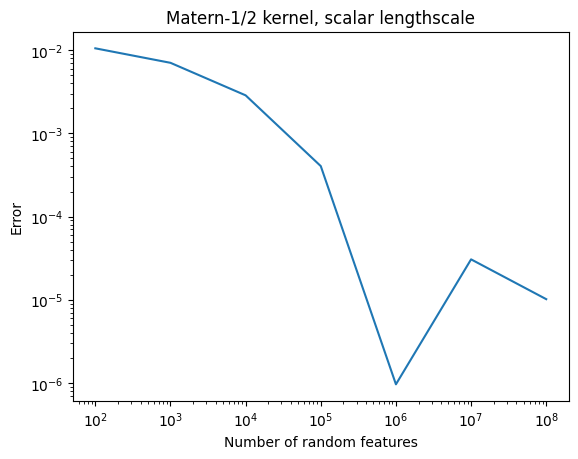

In [7]:
diffs_00 = test_rf_fn_grid(Matern12LinOp, partial(matern_random_features, nu=0.5), X, lengthscale_scalar, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-1/2 kernel, scalar lengthscale")

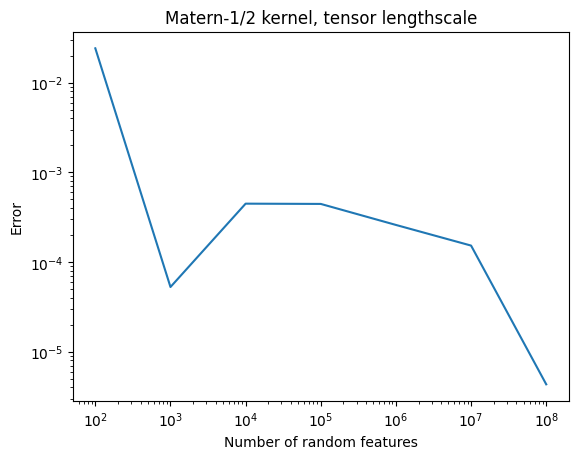

In [8]:
diffs_00 = test_rf_fn_grid(Matern12LinOp, partial(matern_random_features, nu=0.5), X, lengthscale_tensor, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-1/2 kernel, tensor lengthscale")

Matern-3/2

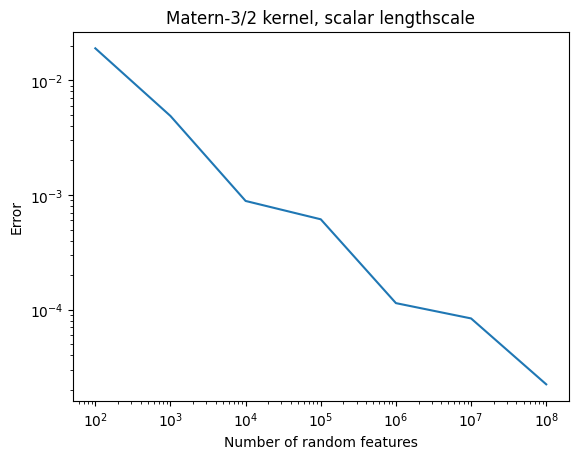

In [9]:
diffs_00 = test_rf_fn_grid(Matern32LinOp, partial(matern_random_features, nu=1.5), X, lengthscale_scalar, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-3/2 kernel, scalar lengthscale")

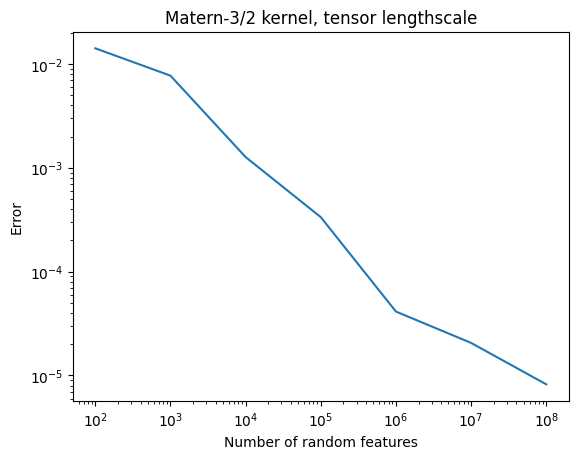

In [10]:
diffs_00 = test_rf_fn_grid(Matern32LinOp, partial(matern_random_features, nu=1.5), X, lengthscale_tensor, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-3/2 kernel, tensor lengthscale")

Matern-5/2

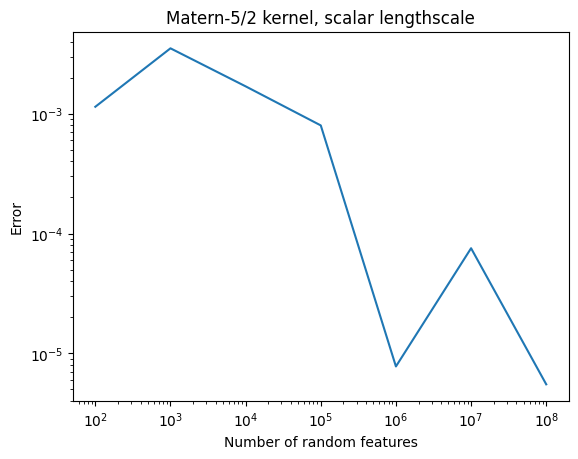

In [11]:
diffs_00 = test_rf_fn_grid(Matern52LinOp, partial(matern_random_features, nu=2.5), X, lengthscale_scalar, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-5/2 kernel, scalar lengthscale")

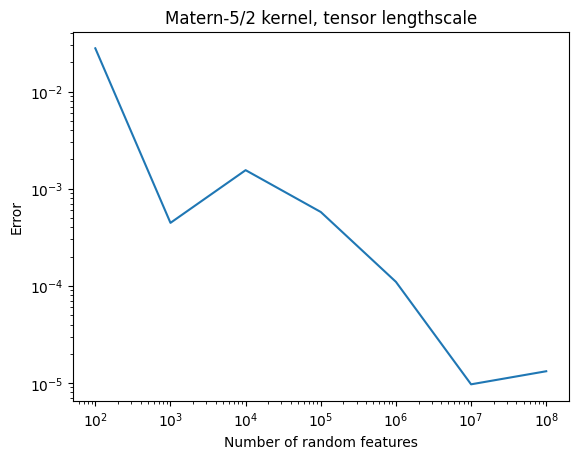

In [12]:
diffs_00 = test_rf_fn_grid(Matern52LinOp, partial(matern_random_features, nu=2.5), X, lengthscale_tensor, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-5/2 kernel, tensor lengthscale")